In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'Iris.csv')
df=pd.DataFrame(data)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
unique=df['Species'].unique()

In [4]:
unique

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


C:\Users\Gyanender\AppData\Local\Temp\ipykernel_15904\2122381817.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: title={'center': 'Correlation With Each Variables'}>

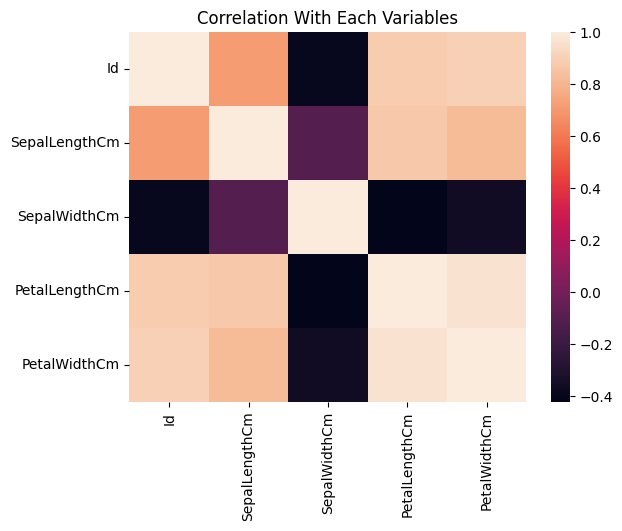

In [7]:
plt.title("Correlation With Each Variables")
sns.heatmap(df.corr())

In [8]:
dict={}
for k,v in enumerate(unique,0):
    dict.update({k:v})
print(dict)


{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}


In [9]:
for i in df['Species'].values:
    if i == 'Iris-setosa':
        df['Species']=0
    elif i == 'Iris-versicolor':
        df['Species']=1
    else:
        df['Species']=3




In [10]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,3
1,2,4.9,3.0,1.4,0.2,3
2,3,4.7,3.2,1.3,0.2,3
3,4,4.6,3.1,1.5,0.2,3
4,5,5.0,3.6,1.4,0.2,3


In [11]:
x=df.drop(columns=['Species'])
y=df['Species']

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

In [13]:
print("X Train Shape", x_train.shape)
print("X Test Shape", x_test.shape)
print("Y Train Shape", y_train.shape)
print("Y Test Shape", y_test.shape)
y_test

X Train Shape (105, 5)
X Test Shape (45, 5)
Y Train Shape (105,)
Y Test Shape (45,)


114    3
62     3
33     3
107    3
7      3
100    3
40     3
86     3
76     3
71     3
134    3
51     3
73     3
54     3
63     3
37     3
78     3
90     3
45     3
16     3
121    3
66     3
24     3
8      3
126    3
22     3
44     3
97     3
93     3
26     3
137    3
84     3
27     3
127    3
132    3
59     3
18     3
83     3
61     3
92     3
112    3
2      3
141    3
43     3
10     3
Name: Species, dtype: int64

In [14]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
y_predict

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

In [15]:
from sklearn.metrics import classification_report

In [16]:
report=classification_report(y_test,y_predict)
print(report)

              precision    recall  f1-score   support

           3       1.00      1.00      1.00        45

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [17]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier(random_state=0)
model1.fit(x_train,y_train)
y_predict1=model1.predict(x_test)
y_predict1

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3], dtype=int64)

In [18]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(n_estimators=10,random_state=0)
model2.fit(x_train,y_train)
y_predict2=model1.predict(x_test)
y_predict2

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3], dtype=int64)

In [20]:
from sklearn.metrics import r2_score
model_score=r2_score(y_test,y_predict)
print("Linear Regression Model Score is :" ,model_score*100 )
model_score1=r2_score(y_test,y_predict1)
print("Decision Tree Model Score is :" ,model_score1*100 )
model_score2=r2_score(y_test,y_predict2)
print("Random Forest Model Score is :" ,model_score2*100 )


Linear Regression Model Score is : 100.0
Decision Tree Model Score is : 100.0
Random Forest Model Score is : 100.0
